<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-7-restricted-boltzmann-machine-and-autoencoders/module_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 7: Assignment

Load the ‘MNIST’ dataset and perform the following tasks:

* Create an autoencoder with convolutional layers
* Compare the accuracy of the model with the previous model (without the convolutional layers, that me built in module 7 class).

Reference: https://www.edureka.co/blog/autoencoders-tutorial/

### Convolution Autoencoders

Autoencoders in their traditional formulation does not take into account the fact that a signal can be seen as a sum of other signals. Convolutional Autoencoders use the convolution operator to exploit this observation. They learn to encode the input in a set of simple signals and then try to reconstruct the input from them, modify the geometry or the reflectance of the image.

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/10/4-Figure1-1-528x192.png?raw=1' width='800'/>

Use cases of CAE:

* Image Reconstruction
* Image Colorization
* latent space clustering
* generating higher resolution images

In [1]:
import numpy as np
from keras.layers import Input, Dense, Reshape, Conv2D, Flatten, MaxPool2D, Conv2DTranspose
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


Let's load MNIST dataset.

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
# split the autoencoder model into two submodels: the encoder and the decoder.
conv_encoder = Sequential([
  Reshape([28, 28, 1], input_shape=[28, 28]), # encoder takes 28 × 28–pixel grayscale images, flattens them to vector of size 784
  Conv2D(16, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(32, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(64, kernel_size=3, padding="same", activation="relu"),
  MaxPool2D(pool_size=2)
])

conv_decoder = Sequential([
  Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", activation="relu", input_shape=[3, 3, 64]),
  Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="relu"),
  Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid"),
  Reshape([28, 28])
])

conv_autoencoder = Sequential([conv_encoder, conv_decoder])
conv_autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0), metrics=['accuracy'])

# Finally, we train the model using X_train as both the inputs and the targets
# and similarly, we use X_valid as both the validation inputs and targets
history = conv_autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/10





55000/55000 [==============================] - 25s 456us/step - loss: 0.1538 - acc: 0.8073 - val_loss: 0.1046 - val_acc: 0.8138
Epoch 2/10
55000/55000 [==============================] - 13s 238us/step - loss: 0.0954 - acc: 0.8131 - val_loss: 0.0920 - val_acc: 0.8129
Epoch 3/10
55000/55000 [==============================] - 13s 239us/step - loss: 0.0875 - acc: 0.8141 - val_loss: 0.0919 - val_acc: 0.8148
Epoch 4/10
55000/55000 [==============================] - 13s 240us/step - loss: 0.0835 - acc: 0.8145 - val_loss: 0.0819 - val_acc: 0.8146
Epoch 5/10
55000/55000 [==============================] - 13s 239us/step - loss: 0.0810 - acc: 0.8147 - val_loss: 0.0801 - val_acc: 0.8149
Epoch 6/10
55000/55000 [==============================] - 13s 240us/step - loss: 0.0794 - acc: 0.8148 - val_loss: 0.0782 - val_acc: 0.8151
Epoch 7/1

In [0]:
# encode and decode some digits note that we take them from the *test* set
encoded_imgs = conv_encoder.predict(X_test)
decoded_imgs = conv_decoder.predict(encoded_imgs)

### Visualizing the reconstructed inputs and the encoded representations using Matplotlib

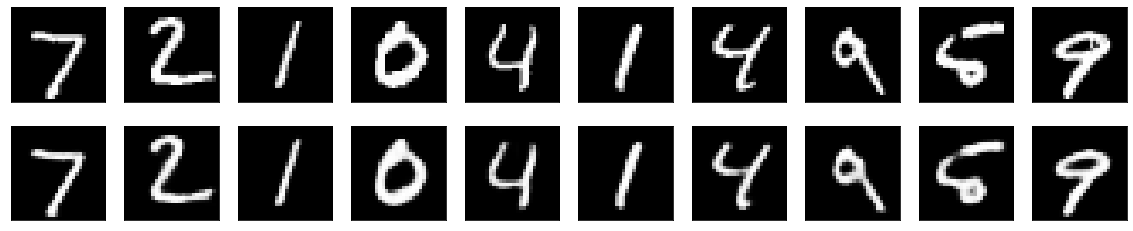

In [5]:
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()